# MNIST Digit Classification

Welcome to `05_mnist_classification` notebook. Here we will explore the techniques and principles necessary for categorizing handwritten digits from the well-known MNIST dataset, a benchmark dataset widely used in the field of machine learning.

This piece will walk through the steps of loading and preprocessing the MNIST dataset, constructing a neural network with a softmax output layer, and training the model to accurately classify the digits. It will also delve into the evaluation metrics used to measure the model's performance, such as accuracy and confusion matrices, to provide a clear understanding of the classification results.

Additionally, this notebook offers an in-depth analysis of various hyperparameters and their effects on model training and accuracy. Here we experiment with different learning rates, batch sizes, and network architectures to demonstrate how these factors influence the convergence and generalization of the model.

## Understanding the MNIST dataset

The MNIST (Modified National Institute of Standards and Technology) dataset is a large collection of handwritten digits, commonly used for training and testing in the field of machine learning. It serves as a benchmark dataset for evaluating algorithms and models, particularly in the area of image classification. The dataset consists of 70,000 grayscale images of digits, split into 60,000 training images and 10,000 testing images, each of which is 28x28 pixels in size. The pixels are represented as integers in the range of 0 to 255, where 0 corresponds to a white pixel (background) and 255 corresponds to a black pixel (foreground).

Some of its key features include:

1. **Diversity and simplicity:** The images in the MNIST dataset cover a wide variety of handwriting styles, providing a comprehensive set of examples for each digit (0-9). Despite its simplicity, the dataset contains enough variability in the handwriting to pose a challenging problem for classification models. This variability makes it an excellent testbed for machine learning algorithms, allowing researchers to assess how well their models generalize across different handwriting styles.

2. **Standardized format:** Each image in the dataset is normalized and centered in a fixed-size 28x28 pixel grid. This standardization facilitates uniformity, ensuring that the models trained on the dataset can focus on learning the underlying patterns rather than adjusting for size and position variations. The images are also grayscale, which reduces the computational complexity compared to colored images while retaining enough information for accurate classification.

3. **Labels and class distribution:** The dataset is accompanied by labels for each image, indicating the correct digit (0-9) represented. This labeled aspect makes the MNIST dataset a supervised learning dataset, where models can be trained using the input images and their corresponding labels. The distribution of digits is approximately uniform, ensuring that each digit is well-represented in both the training and testing sets. This uniform distribution helps in training balanced models without bias toward any particular class.

4. **Preprocessing and augmentation:** While the MNIST dataset comes preprocessed, researchers often apply additional preprocessing techniques, such as normalization, to scale pixel values between 0 and 1, and data augmentation to artificially increase the size and variability of the training set. Common augmentation techniques include random rotations, shifts, and scaling, which help models become more robust to variations in the input data.

5. **Accessibility and historical context:** The MNIST dataset is widely accessible and has been extensively used since its introduction in 1998 by Yann LeCun and colleagues. It has become a standard benchmark in the field, allowing for the comparison of new algorithms and models against established results. The historical significance of MNIST lies in its role in the development and evaluation of early neural networks and continues to be a relevant dataset for testing modern deep learning architectures.

## Setting up the environment


##### **Q1: How do you install the necessary libraries for working with the MNIST dataset in PyTorch?**

In [1]:
# !pip install torch torchvision torchaudio
# !pip install numpy matplotlib  # extra libraries for other stuff

##### **Q2: How do you import the required modules for MNIST digit classification?**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Loading and preprocessing the data


##### **Q3: How do you download the MNIST dataset using PyTorch?**

In [3]:
# Define transformations: convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Download and load the training data
train_dataset = datasets.MNIST(root='../00-src', train=True, download=True, transform=transform)
print("Training dataset succesfully downloaded")

# Download and load the test data
test_dataset = datasets.MNIST(root='../00-src', train=False, download=True, transform=transform)
print("Testing dataset succesfully downloaded")

Training dataset succesfully downloaded
Testing dataset succesfully downloaded


##### **Q4: How do you normalize the MNIST data for neural network training?**

In [4]:
# Same as above. i.e.,
# transform = transforms.Compose([
#     transforms.ToTensor(),  # Convert image to tensor
#     transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
# ])

##### **Q5: How do you split the MNIST data into training and testing sets?**

In [5]:
# Already done so in the downloading step. i.e.,
# train_dataset = datasets.MNIST(root='../00-src', train=True, download=True, transform=transform)
# print("Training dataset succesfully downloaded")

# test_dataset = datasets.MNIST(root='../00-src', train=False, download=True, transform=transform)
# print("Testing dataset succesfully downloaded")

##### **Q6: How do you create data loaders for the MNIST dataset in PyTorch?**

In [6]:
# For the training set
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# For the test set
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

## Building the neural network model


##### **Q7: How do you define the architecture of a neural network for MNIST digit classification using `nn.Module` in PyTorch?**

In [7]:
# Define the neural network class
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        # Define the layers
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (784) to hidden layer (128)
        self.fc2 = nn.Linear(128, 64)       # Hidden layer (128) to another hidden layer (64)
        self.fc3 = nn.Linear(64, 10)        # Hidden layer (64) to output layer (10 for 10 classes)

    def forward(self, x):
        # Flatten the image to a vector of size 28*28
        x = x.view(-1, 28 * 28)
        # Apply first fully connected layer with ReLU activation
        x = F.relu(self.fc1(x))
        # Apply second fully connected layer with ReLU activation
        x = F.relu(self.fc2(x))
        # Output layer with logits (raw scores)
        x = self.fc3(x)
        return x

# Instantiate the network
model = MNISTClassifier()

##### **Q8: How do you initialize the weights and biases of the neural network?**

In [8]:
# Doing so manually (i.e., directly access the weights and biases of the layers and set them manually)
import torch.nn.init as init

class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
        # Initialize weights and biases
        self._initialize_weights()

    def _initialize_weights(self):
        # Initialize weights using Xavier uniform distribution
        init.xavier_uniform_(self.fc1.weight)  # sets the weights by sampling from a uniform distribution with a specific range, ensuring that the variance of the inputs and outputs is maintained across layers
        init.xavier_uniform_(self.fc2.weight)
        init.xavier_uniform_(self.fc3.weight)
        
        # Initialize biases to zero
        nn.init.constant_(self.fc1.bias, 0)  # ...as they do not have the same variance issues as weights
        nn.init.constant_(self.fc2.bias, 0)
        nn.init.constant_(self.fc3.bias, 0)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the network
model = MNISTClassifier()

In [10]:
# Another predefined initialization option (aside from Xavier): Kaiming
layer = nn.Linear(784, 128)

kaiming = init.kaiming_uniform_(layer.weight, nonlinearity='relu')  # ensures that the variance of the outputs is maintained across layers, which helps in preventing exploding/vanishing gradients

##### **Q9: How do you choose activation functions for the layers in your neural network?**

In [11]:
# ReLu: Commonly used for hidden layers to introduce non-linearity
relu_layer = nn.ReLU()

# Sigmoid: Often used in the output layer for binary classification to get probabilities
sigmoid_layer = nn.Sigmoid()

# Tanh: Sometimes used in hidden layers to center the data around zero
tanh_layer = nn.Tanh()

# Leaky ReLU: A variant of ReLU that allows a small, non-zero gradient when the unit is not active
leaky_relu_layer = nn.LeakyReLU(negative_slope=0.01)

# Softmax: Used in the output layer for multi-class classification problems to get a probability distribution over classes
softmax_layer = nn.Softmax(dim=1)

## Defining the loss function and optimizer


##### **Q10: How do you select the appropriate loss function for MNIST digit classification?**

In [12]:
# One of the best options out there: CrossEntropyLoss
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)   # Flatten the input
        x = F.relu(self.fc1(x))   # ReLU activation
        x = F.relu(self.fc2(x))   # ReLU activation
        x = self.fc3(x)           # Output layer (logits)
        return x
    
model = MNISTClassifier()

# Define the loss function
criterion = nn.CrossEntropyLoss()

##### **Q11: How do you configure an optimizer for training the neural network?**

In [13]:
# Two common(est) options: SGD 
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# and Adam
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training the neural network model


##### **Q12: How do you set up the training loop for the MNIST neural network in PyTorch?**

In [14]:
# Set the number of epochs
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.1273
Epoch [2/10], Loss: 0.2265
Epoch [3/10], Loss: 0.0766
Epoch [4/10], Loss: 0.0371
Epoch [5/10], Loss: 0.0597
Epoch [6/10], Loss: 0.0491
Epoch [7/10], Loss: 0.1535
Epoch [8/10], Loss: 0.0196
Epoch [9/10], Loss: 0.0025
Epoch [10/10], Loss: 0.0136


##### **Q13: How do you train the neural network on the MNIST dataset?**

In [15]:
# See the training loop

##### **Q14: How do you monitor training progress during the training process?**

In [16]:
# You can add more stats to the training loop, which enables you to better visualize how it's progressing
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Accumulate the running loss
        running_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Calculate average loss and accuracy
    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    
    # Print statistics
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch [1/10], Loss: 0.0449, Accuracy: 98.50%
Epoch [2/10], Loss: 0.0446, Accuracy: 98.50%
Epoch [3/10], Loss: 0.0405, Accuracy: 98.60%
Epoch [4/10], Loss: 0.0401, Accuracy: 98.64%
Epoch [5/10], Loss: 0.0352, Accuracy: 98.79%
Epoch [6/10], Loss: 0.0354, Accuracy: 98.80%
Epoch [7/10], Loss: 0.0330, Accuracy: 98.86%
Epoch [8/10], Loss: 0.0309, Accuracy: 98.97%
Epoch [9/10], Loss: 0.0292, Accuracy: 98.98%
Epoch [10/10], Loss: 0.0268, Accuracy: 99.10%


## Evaluating the model


##### **Q15: How do you make predictions using the trained MNIST neural network?**

In [24]:
# Set the model to evaluation mode
model.eval()

# Example input (a batch of images)
example_inputs, example_labels = next(iter(test_loader))

# Make predictions
with torch.no_grad():
    outputs = model(example_inputs)
    _, predicted = torch.max(outputs, 1)

print(f'Predicted: {predicted}')
print(f'Actual: {example_labels}')

Predicted: tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])
Actual: tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])


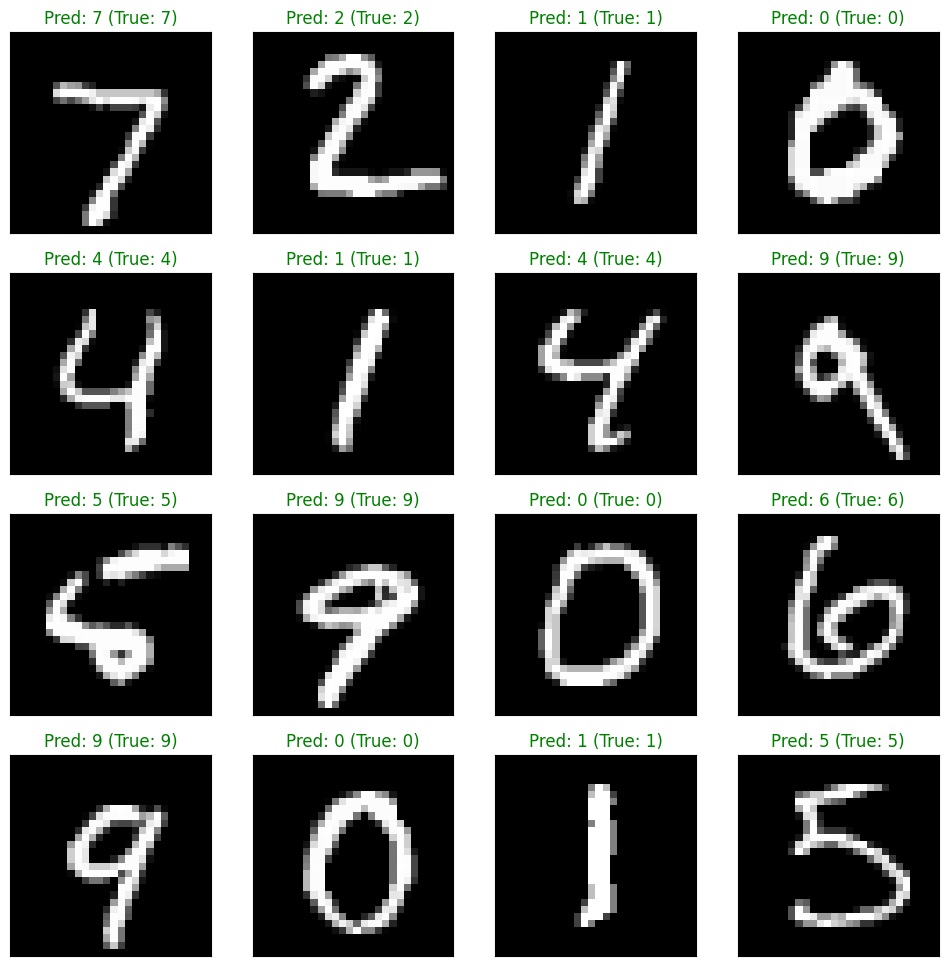

In [25]:
# Alternative: Plot the images with predictions and true labels
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
for idx in range(16):  # Display 16 images
    ax = fig.add_subplot(4, 4, idx + 1, xticks=[], yticks=[])
    plt.imshow(example_inputs[idx].numpy().squeeze(), cmap='gray')
    ax.set_title(f"Pred: {predicted[idx].item()} (True: {example_labels[idx].item()})", 
                 color=("green" if predicted[idx]==example_labels[idx] else "red"))
plt.show()

##### **Q16: How do you calculate the accuracy of the MNIST neural network model?**

In [26]:
# Compare predicted labels with true labels 
correct = 0
total = 0

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the 10,000 test images: {accuracy:.2f}%')

Accuracy of the model on the 10,000 test images: 97.55%


##### **Q17: How do you visualize the performance of the MNIST neural network model?**

In [28]:
# For illustration, another training loop - only this time it stores values relevant to the performance of the model, instead of just providing them in the epochs
val_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)  # doing this just to save time - in the ideal scenario there would be a proper validation set

num_epochs = 10

# Lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    
    # Store training metrics
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)
    
    # Evaluate on validation set
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for val_inputs, val_labels in test_loader:
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()
            
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()
    
    val_avg_loss = val_running_loss / len(test_loader)
    val_accuracy = 100 * val_correct / val_total
    
    # Store validation metrics
    val_losses.append(val_avg_loss)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_loss:.4f}, Train Accuracy: {accuracy:.2f}%, Val Loss: {val_avg_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

Epoch [1/10], Train Loss: 0.0252, Train Accuracy: 99.11%, Val Loss: 0.1091, Val Accuracy: 97.44%
Epoch [2/10], Train Loss: 0.0284, Train Accuracy: 99.00%, Val Loss: 0.1082, Val Accuracy: 97.53%
Epoch [3/10], Train Loss: 0.0227, Train Accuracy: 99.21%, Val Loss: 0.1031, Val Accuracy: 97.66%
Epoch [4/10], Train Loss: 0.0268, Train Accuracy: 99.11%, Val Loss: 0.1067, Val Accuracy: 97.66%
Epoch [5/10], Train Loss: 0.0207, Train Accuracy: 99.31%, Val Loss: 0.1082, Val Accuracy: 97.64%
Epoch [6/10], Train Loss: 0.0238, Train Accuracy: 99.16%, Val Loss: 0.1167, Val Accuracy: 97.57%
Epoch [7/10], Train Loss: 0.0190, Train Accuracy: 99.31%, Val Loss: 0.1035, Val Accuracy: 97.71%
Epoch [8/10], Train Loss: 0.0194, Train Accuracy: 99.31%, Val Loss: 0.1393, Val Accuracy: 97.12%
Epoch [9/10], Train Loss: 0.0250, Train Accuracy: 99.19%, Val Loss: 0.1032, Val Accuracy: 97.75%
Epoch [10/10], Train Loss: 0.0179, Train Accuracy: 99.40%, Val Loss: 0.1122, Val Accuracy: 97.78%


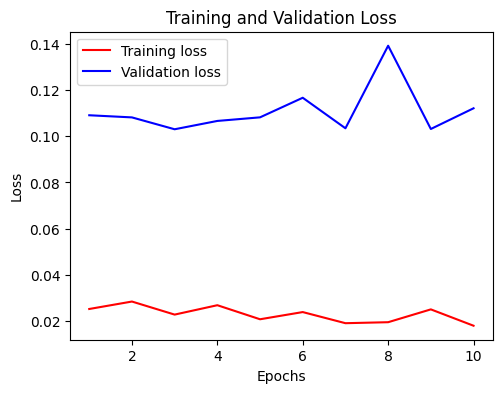

In [30]:
# Plotting the stored metrics
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 4))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'r', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

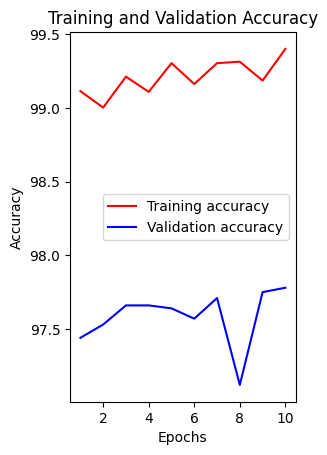

In [31]:
# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

##### **Q18: How do you create a confusion matrix to evaluate the performance of the MNIST digit classification model?**

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Set the model to evaluation mode
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:  # Using the validation (= test) loader
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        
# Compute the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

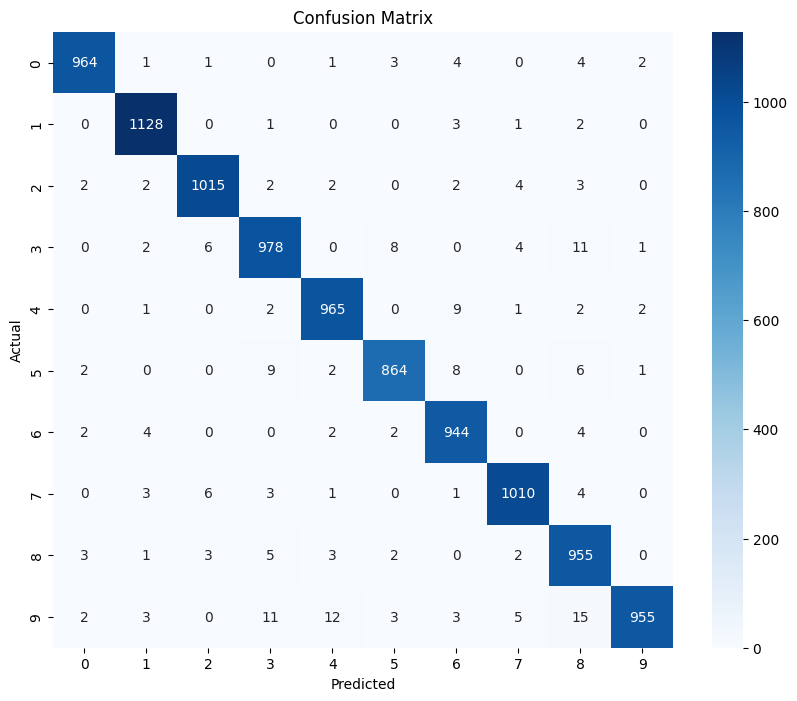

In [33]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Saving and loading the model


##### **Q19: How do you save the trained MNIST neural network model in PyTorch?**

In [34]:
# Save the model's state dictionary
model_path = 'mnist_model.pth'
torch.save(model.state_dict(), model_path)

##### **Q20: How do you load a saved MNIST neural network model in PyTorch?**

In [35]:
# Instantiate the model
loaded_model = MNISTClassifier()

# Load the state dictionary
loaded_model.load_state_dict(torch.load(model_path))

# Set the model to evaluation mode
loaded_model.eval()

C:\Users\fellm\AppData\Local\Temp\ipykernel_16832\1194793714.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_path))


MNISTClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [36]:
import os

# Delete the saved model file
os.remove(model_path)

## Hyperparameter tuning and optimization


##### **Q21: How do you perform hyperparameter tuning to improve the performance of the MNIST neural network?**

##### **Q22: What regularization techniques can you implement to prevent overfitting in the MNIST neural network?**

##### **Q23: How do you use learning rate scheduling to adjust the learning rate during training?**

## Handling model improvements


##### **Q24: How do you apply data augmentation techniques to the MNIST dataset?**

##### **Q25: How do you fine-tune the MNIST neural network model for better performance?**

##### **Q26: How do you evaluate the improvements made to the MNIST neural network model?**

## Conclusion


## Further exercises


##### **Q27: How do you experiment with different neural network architectures for MNIST digit classification?**

##### **Q28: How do you apply data augmentation techniques to improve model robustness?**

##### **Q29: How do you test the MNIST neural network model on different digit datasets?**

##### **Q30: How do you integrate more advanced regularization methods into the MNIST neural network model?**

##### **Q31: How do you deploy the MNIST neural network model for real-time digit recognition?**